In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.
Found 436 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 54s 4s/step - loss: 0.1542 - accuracy: 0.9495 - val_loss: 0.1199 - val_accuracy: 0.9541
Epoch 2/10
14/14 [==============================] - 52s 4s/step - loss: 0.1284 - accuracy: 0.9472 - val_loss: 0.1057 - val_accuracy: 0.9633
Epoch 3/10
14/14 [==============================] - 52s 4s/step - loss: 0.1106 - accuracy: 0.9656 - val_loss: 0.1208 - val_accuracy: 0.9427
Epoch 4/10
14/14 [==============================] - 52s 4s/step - loss: 0.2103 - accuracy: 0.9083 - val_loss: 0.1925 - val_accuracy: 0.9633
Epoch 5/10
14/14 [==============================] - 54s 4s/step - loss: 0.1261 - accuracy: 0.9564 - val_loss: 0.2068 - val_accuracy: 0.9266
Epoch 6/10
14/14 [==============================] - 52s 4s/step - loss: 0.1660 - accuracy: 0.9381 - val_loss: 0.1333 - val_accuracy: 0.9633
Epoch 7/10
14/14 [==============================] - 50s 4s/step - loss: 0.1004 - accuracy: 0.9656 - val_loss: 0.0779 - val_accuracy: 0.9725
Epoch 8/10
14/14 [==

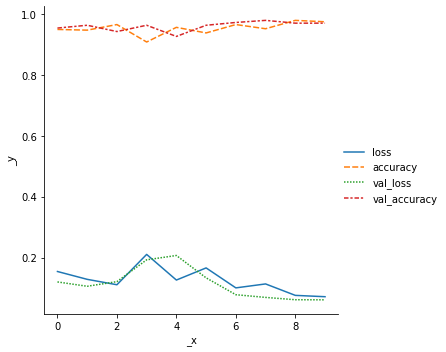

In [9]:
import seaborn as plt

plt.relplot(data=r.history, kind="line")

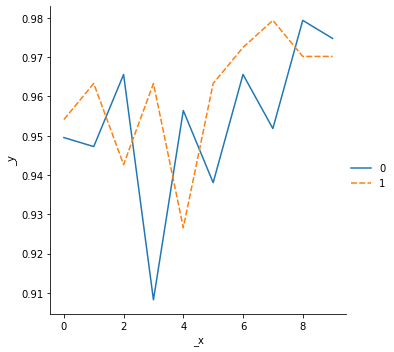

In [10]:
import seaborn as plt

plt.relplot(data=[r.history["accuracy"],r.history["val_accuracy"]], kind="line")